## pCMV-Target-ACEmax construction
The Target-ACEmax plasmid (pCMV-Target-ACEmax) was constructed by assembling an ABEmax fragment obtained from pCMV-ABEmax using SI945/SI1305, a fragment encoding the C-terminus region of Target-AIDmax obtained from pUC-optimized-PmCDA1-ugi using SI1304/SI1307, and a plasmid backbone obtained from pCMV-ABEmax using SI1310/SI1309.

In [1]:
%matplotlib inline

In [2]:
import sys 
sys.path.append("../../")
from QUEEN.queen import *
set_namespace(globals())
if "output" not in os.listdir("./"):
    os.mkdir("output")

In [3]:
QUEEN(record="output/pCMV-Target-AIDmax.gbk", product="pCMV_Target_AIDmax") 

<queen.QUEEN object; project='pCMV_Target_AIDmax', length='8725 bp', topology='circular'>

In [4]:
quine(pCMV_Target_AIDmax, execution=True)
source = pCMV_Target_AIDmax.productdict
for key in source:
    print(source[key])

The quine code correctly reconstructed the given QUEEN object.
<queen.QUEEN object; project='pCMV_Target_AIDmax', length='8725 bp', topology='circular'>
<queen.QUEEN object; project='pCMV_BE4max', length='8961 bp', topology='circular'>
<queen.QUEEN object; project='pCMV_ABEmax', length='8811 bp', topology='circular'>
<queen.QUEEN object; project='opt_CDA1_ugi', length='3874 bp', topology='circular'>
<queen.QUEEN object; project='SI1308', length='45 bp', sequence='ACCAAAGAAGAAGCGGAAAGTCGACAAGAAGTACAGCATCGGCCT', topology='linear'>
<queen.QUEEN object; project='SI1305', length='25 bp', sequence='GTCACCTCCCAGCTGAGACAGGTCG', topology='linear'>
<queen.QUEEN object; project='extract6', length='4053 bp', topology='linear'>
<queen.QUEEN object; project='fragment6', length='4123 bp', topology='linear'>
<queen.QUEEN object; project='SI1304', length='45 bp', sequence='CCTGTCTCAGCTGGGAGGTGACGGCGGAGGAGGAACTGGAGGAGG', topology='linear'>
<queen.QUEEN object; project='SI1307', length='45 bp', sequence=

In [5]:
processname1 = "PCR"
description1 = "An ABEmax fragment (fragment13) obtained from pCMV-ABEmax using SI945/SI1305"
QUEEN(seq="AGATCCGCGGCCGCTAATACGACTCACTATAGG", product="SI945", pn=processname1, pd=description1)
source["pCMV_ABEmax"].searchsequence(SI945.seq[-18:], product="FW13", pn=processname1, pd=description1)
source["pCMV_ABEmax"].searchsequence(source["SI1305"].seq[-18:], product="RV13", pn=processname1, pd=description1)
cropdna(source["pCMV_ABEmax"], FW13[0].end, RV13[0].start, product="extract13", pn=processname1, pd=description1)
modifyends(extract13, SI945.seq, source["SI1305"].rcseq, product="fragment13", pn=processname1, pd=description1)

<queen.QUEEN object; project='fragment13', length='5392 bp', topology='linear'>

In [6]:
processname2 = "Gibson Assembly"
description2 = "Gibson Assembly-5:The Target-ACEmax plasmid (pCMV-Target-ACEmax) was constructed by assembling a insert fragment and two backbone fragments."
modifyends(source["fragment7"], "*{22}/-{22}", "-{24}/*{24}",  product="fragment7_mod", pn=processname2, pd=description2)
modifyends(source["fragment8"], "*{24}/-{24}","-{103}/*{103}", product="fragment8_mod", pn=processname2, pd=description2)
modifyends(fragment13, "*{103}/-{103}","-{22}/*{22}", product="fragment13_mod", pn=processname2, pd=description2)
joindna(fragment7_mod, fragment8_mod, fragment13_mod, topology="circular", product="pCMV_Target_ACEmax", pn=processname2, pd=description2)

<queen.QUEEN object; project='pCMV_Target_ACEmax', length='9913 bp', topology='circular'>

In [7]:
pCMV_Target_ACEmax.printfeature()

feature_id  feature_type  qualifier:label         start  end   strand  
1           source        source                  0      2950  +       
100         primer_bind   BGH-rev                 4      22    -       
200         polyA_signal  bGH poly(A) signal      10     235   +       
300         primer_bind   M13 Reverse             305    322   -       
400         primer_bind   M13/pUC Reverse         318    341   -       
500         protein_bind  lac operator            329    346   +       
600         promoter      lac promoter            353    384   -       
700         protein_bind  CAP binding site        398    420   +       
800         primer_bind   L4440                   536    554   -       
900         rep_origin    ori                     707    1296  -       
1000        primer_bind   pBR322ori-F             787    807   -       
1100        CDS           AmpR                    1466   2327  -       
1200        primer_bind   Amp-R                   2089   2109  +

In [8]:
#Verification of quine code
quine(pCMV_Target_ACEmax, execution=True)

The quine code correctly reconstructed the given QUEEN object.


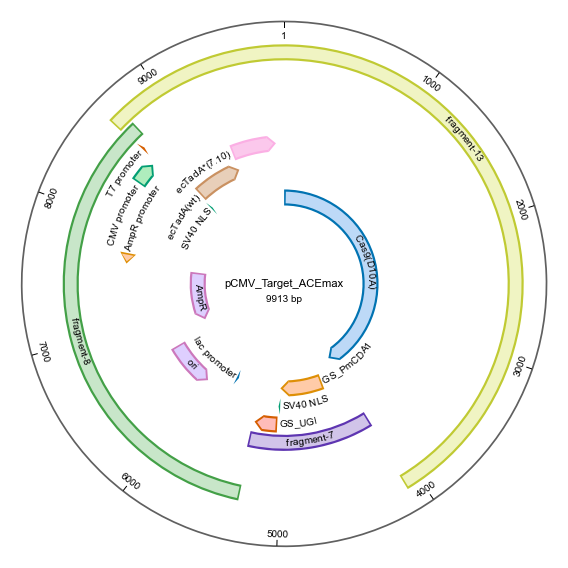

In [9]:
#Visuailze annotated sequence map
list600  = ["#E53935","#D81B60","#8E24AA","#5E35B1","#3949AB","#1E88E5","#039BE5","#00ACC1","#00897B","#43A047","#7CB342","#C0CA33","#FDD835","#FFB300","#FB8C00","#F4511E","#6D4C41","#546E7A"]
list100  = ["#ffcdd2","#f8bbd0","#e1bee7","#d1c4e9","#c5cae9","#bbdefb","#b3e5fc","#b2ebf2","#b2dfdb","#c8e6c9","#dcedc8","#f0f4c3","#fff9c4","#ffecb3","#ffe0b2","#ffccbc","#d7ccc8","#cfd8dc"]
color_sets = list(zip(list600,list100))
color_sets = [color_sets[0], color_sets[2], color_sets[4], color_sets[5], color_sets[7], color_sets[1], color_sets[3], color_sets[9], color_sets[10], color_sets[12], color_sets[14], color_sets[16], color_sets[11], color_sets[17]]

def add_fragment_annotation(dna, fragment, fragment_id, color_set):
    f = dna.searchsequence(fragment.seq)
    editfeature(dna, source=f, target_attribute="feature_id", operation=createattribute("f{}".format(fragment_id)), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:label", operation=createattribute("fragment-{}".format(fragment_id)), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:edgecolor_queen", operation=createattribute(color_set[0]), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="qualifier:facecolor_queen", operation=createattribute(color_set[1]), new_copy=False)
    editfeature(dna, key_attribute="feature_id", query="f{}".format(fragment_id), target_attribute="strand", operation=replaceattribute(0), new_copy=False)

def visualization(dna):
    dna.searchfeature(key_attribute="qualifier:label", query="^Cas9", product="Cas9")
    plasmid = joindna(cutdna(dna, Cas9[0].start)[0], topology="circular") 
    fragments = plasmid.searchfeature(key_attribute="qualifier:label", query="fragment-[0-9]+")
    for i in range(len(fragments)):
        fragments[i].location.strand = 0
    fragments.sort(key=lambda x:int(x.qualifiers["label"][0].split("-")[1]))
    features  = plasmid.searchfeature(key_attribute="feature_type", query="CDS") + plasmid.searchfeature(key_attribute="feature_type", query="promoter") + plasmid.searchfeature(key_attribute="feature_type", query="rep_origin") + fragments
    fig       = visualizedna(plasmid, feature_list=features, map_view="circular", tick_space=1000, title=dna.project)
    return fig

add_fragment_annotation(pCMV_Target_ACEmax, source["fragment7"],  "7", color_sets[6])
add_fragment_annotation(pCMV_Target_ACEmax, source["fragment8"],  "8", color_sets[7])
add_fragment_annotation(pCMV_Target_ACEmax, fragment13, "13", color_sets[12])
fig = visualization(pCMV_Target_ACEmax)

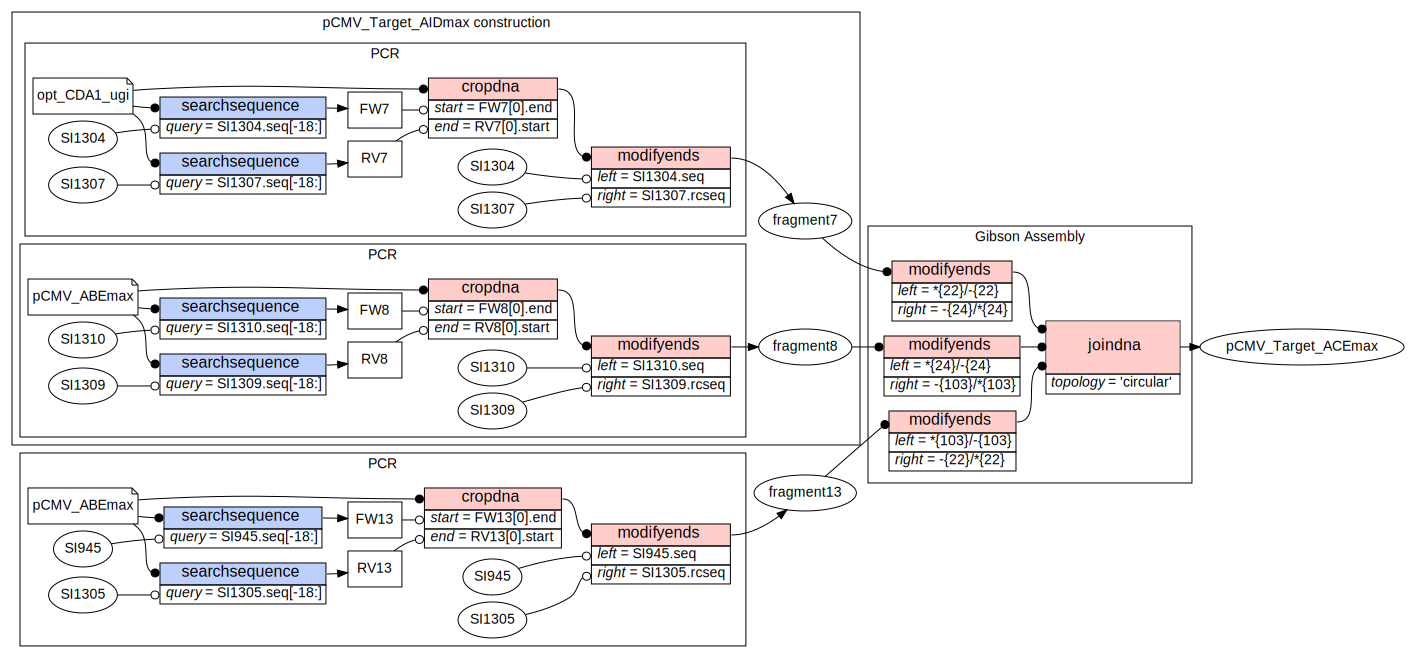

In [10]:
flow = visualizeflow(pCMV_Target_ACEmax)
flow.render("output/pCMV_Target_ACEmax_construction_v2")
flow

In [11]:
pCMV_Target_ACEmax.writedna("output/pCMV-Target-ACEmax_v2.gbk")